Purpose of the project:

To identify which features (customer attributes/variables) most strongly influence whether a customer will respond positively.

Once we know the most important features, the business can focus only on the right customers, instead of wasting resources contacting everyone.

This helps in reducing marketing costs while still improving success rates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Update the path below as per your file location
# Example: "C:/Users/YourName/Downloads/bank-marketing.csv"

path = r"C:\Module\build-modules\Bank_Marketing\bank-marketing.csv"

df = pd.read_csv(path)
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


age: age of the customer.

age group: what age group does the customer lie

eligible: if the customer is eligible for the talk or not.

job: what does the customer do?

salary: salary of the customer

marital: married or not?

education: level of education complitrd

marital-education: married or not- education.

targeted: if the customer or being targeted or not

default: if the customer in default list or not

balance: remaining balance in their accounts

housing: housing

loan: has prior loan or not

contact: source of this information

day: today's date

month: month

duration: number of days

campaign: marketing camoaign

pdays: number of days that passed by after the client was last contacted

previous: previous response

poutcome: outcome of the previous marketing campaign

y: yes or no

response: response of the actor

In [538]:
# format for columns
df.columns = [x.lower().replace('-','_').replace(' ','_') for x in df.columns.to_list()]
df.sample(5,random_state=42)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
3776,40,4,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,...,unknown,16,may,192,1,-1,0,unknown,no,0
9928,47,4,Y,services,70000,single,secondary,single-secondary,yes,no,...,unknown,9,jun,83,2,-1,0,unknown,no,0
33409,25,2,Y,student,4000,single,tertiary,single-tertiary,no,no,...,cellular,20,apr,226,1,-1,0,unknown,no,0
31885,42,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,cellular,9,apr,311,1,336,1,failure,no,0
15738,56,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,cellular,21,jul,121,2,-1,0,unknown,no,0


------------- EDA ------------------
Exploratory Data Analysis

In [539]:
# checking for missing values

df.isna().sum()

age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital_education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [540]:
# Check for Column's unique values
for x in df.columns.to_list():
    print(f"{x}: \n{df[x].sort_values().unique()}\n")
    

age: 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]

age_group: 
[1 2 3 4 5 6 7 8 9]

eligible: 
['N' 'Y']

job: 
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

salary: 
[     0   4000   8000  16000  20000  50000  55000  60000  70000 100000
 120000]

marital: 
['divorced' 'married' 'single']

education: 
['primary' 'secondary' 'tertiary' 'unknown']

marital_education: 
['divorced-primary' 'divorced-secondary' 'divorced-tertiary'
 'divorced-unknown' 'married-primary' 'married-secondary'
 'married-tertiary' 'married-unknown' 'single-primary' 'single-secondary'
 'single-tertiary' 'single-unknown']

targeted: 
['no' 'yes']

default: 
['no' 'yes']

balance: 
[ -8019  -6847  -4057 ...  81204  98417 10212

In [541]:
non_target = df.columns.to_list()
non_target.remove('y')
non_target.remove('response')

# df.duplicated(non_target).sum()

In [542]:
# Now target columns are 'y' and 'target'

# Drop y as its redundant with target column

if 'y' in df.columns.to_list():
    df = df.drop(['y'] , axis = 1)

df.head()

# df.drop(columns='y',inplace=True)
# df.head()

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,no,unknown,5,may,198,1,-1,0,unknown,0


In [543]:
# change pdays -1 to 0

df.pdays = df.pdays.apply(lambda x:0 if (x == -1) else x)
df.sample(5)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24037,34,3,Y,management,100000,divorced,tertiary,divorced-tertiary,no,no,...,no,telephone,29,aug,77,7,0,0,unknown,0
10828,59,5,Y,retired,55000,divorced,primary,divorced-primary,yes,no,...,no,unknown,17,jun,404,1,0,0,unknown,0
18301,41,4,Y,management,100000,single,tertiary,single-tertiary,no,no,...,no,cellular,31,jul,24,4,0,0,unknown,0
23835,32,3,Y,management,100000,single,tertiary,single-tertiary,no,no,...,no,cellular,29,aug,63,2,0,0,unknown,0
6629,29,2,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,no,unknown,28,may,58,1,0,0,unknown,0


In [544]:
# For plotting we need numerical data not categorical
# Seperate num and categorical 

cats = list(df.select_dtypes(include=['object', 'datetime64[ns]','bool']))

nums = list(df.select_dtypes(include='int64'))

print(f" Categorical : \n{cats}")
print(f" Numerical : \n{nums}")

 Categorical : 
['eligible', 'job', 'marital', 'education', 'marital_education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
 Numerical : 
['age', 'age_group', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


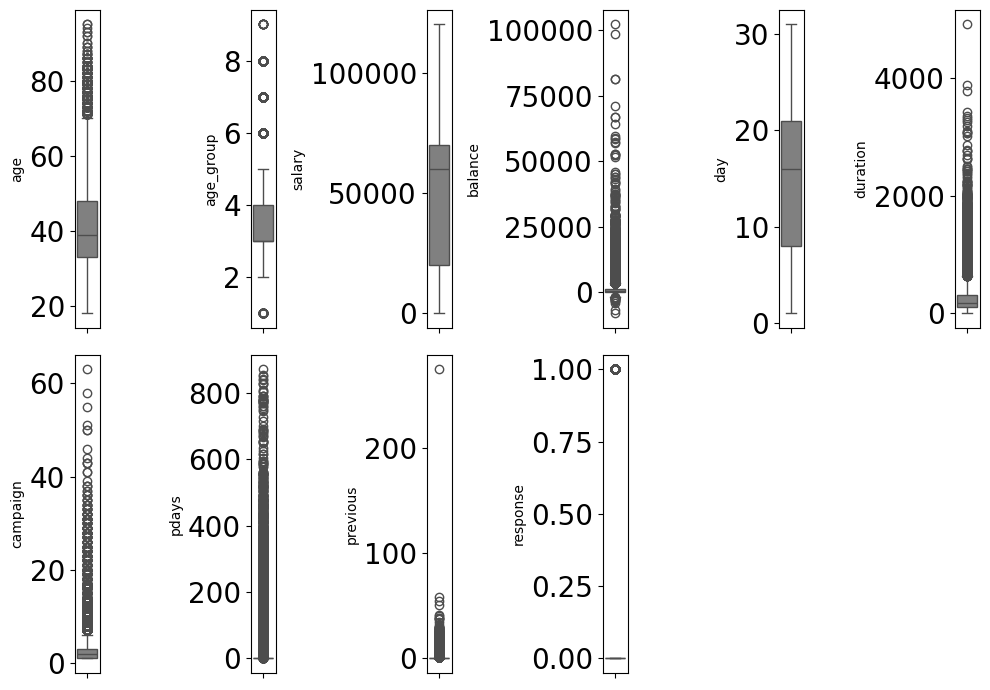

In [545]:
# Detect Outliers
plt.figure(figsize=(10, 7)) 
for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)//2)+1, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [546]:
# for col in ['balance','duration','campaign']:
#     plt.figure(figsize=(2, 2))
#     sns.boxplot(y=df[col], color='gray', orient='v')
#     plt.tight_layout()

In [547]:
# Remove outlier

# Above boxplot shows outliers in 'balance' , 'duration' , 'campaign'
# Remove them using Z-score
# Z-score measures how far a value is from the mean in units of standard deviation.
# In outlier detection, rows with ∣Z∣≥3 in any column are considered outliers and dropped.
# 1. Calculate standard devaiation and mean than apply z score.
# 2. if in any row z score is more than or equal to 3 remove that row as it is outlier.

In [548]:
# zscore to remove outliers

from scipy import stats

print(f" Number of rows before removing outlier : {len(df)}")
# mark all rows as TRUE at start
filter_entries = np.array([True] * len(df))

for col in ['balance','duration','campaign']:
    zscore = abs(stats.zscore(df[col]))         # calculate absolute Z-scores
    filter_entries = (zscore < 3) & filter_entries    # keep only rows with abs(Z) < 3

df = df[filter_entries]          # filter: keep only rows where all selected columns have Z < 3

print(f" Number of rows after removing outliers : {len(df)}")



 Number of rows before removing outlier : 45211
 Number of rows after removing outliers : 42707


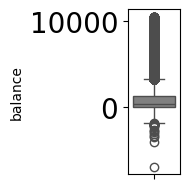

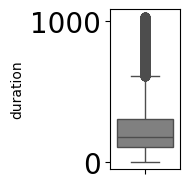

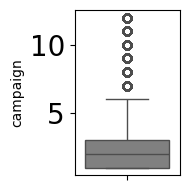

In [549]:
for col in ['balance','duration','campaign']:
    plt.figure(figsize=(2, 2))
    sns.boxplot(y=df[col], color='gray', orient='v')
    plt.tight_layout()

<Axes: >

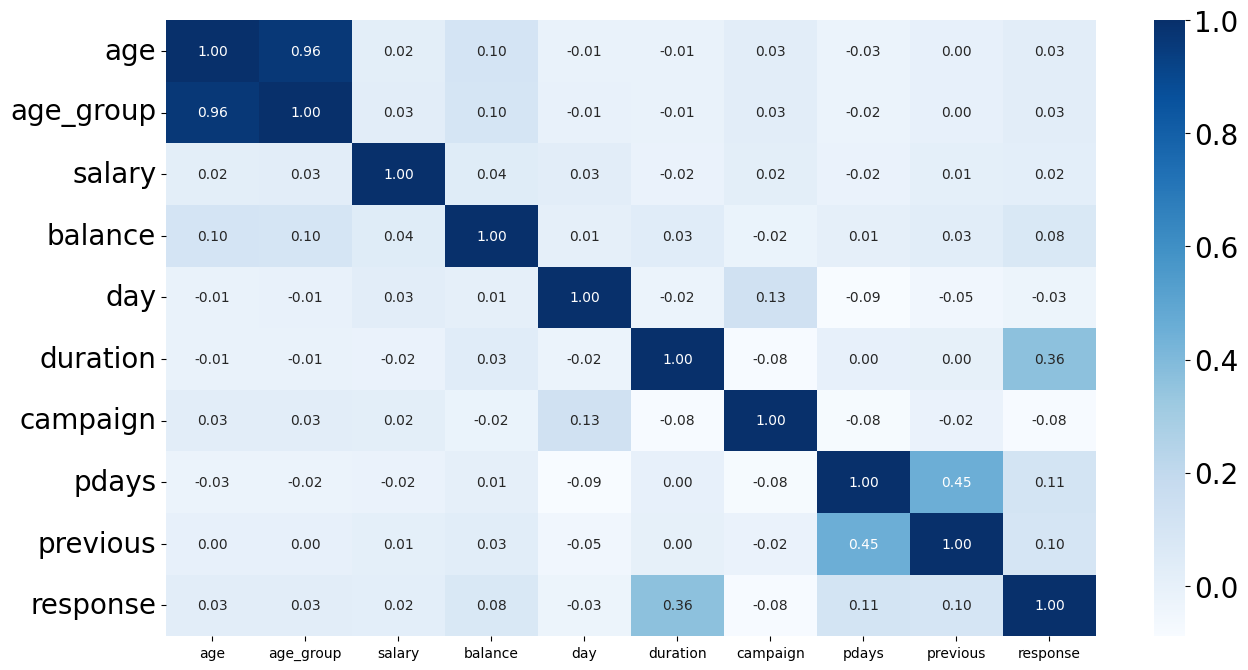

In [550]:
# correlation check

df_new = df[nums].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')


In [551]:
# we're chechking the highest correlation column to our target column('response') 
# and we get column 'duration', 'pdays', and 'previous'

-------------- Insight ----------------------------

<Figure size 1000x1500 with 0 Axes>

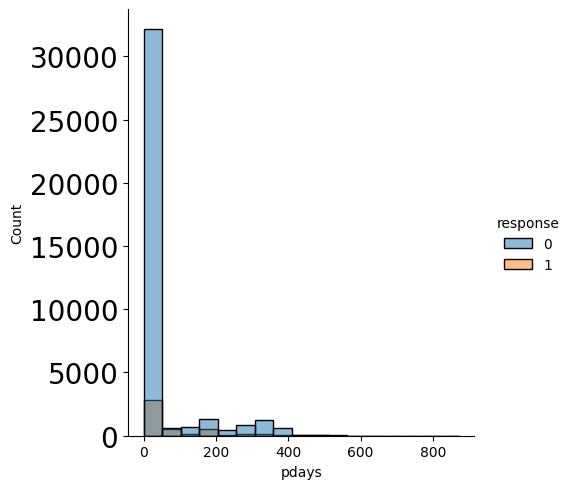

In [552]:
# pdays: number of days that passed by after the client was last contacted.

plt.figure(figsize=(10,15))
sns.displot(x = 'pdays', hue='response', data=df_new, binwidth=50 )

In [553]:
# from above graph tells us that
# When pdays = 0, it means the customer was contacted in the current campaign. In this case, the response rate is higher.
# As pdays increases (e.g., around 400 days since last contact), the response rate decreases, 
# meaning the likelihood of product purchase drops.


<Figure size 1000x1500 with 0 Axes>

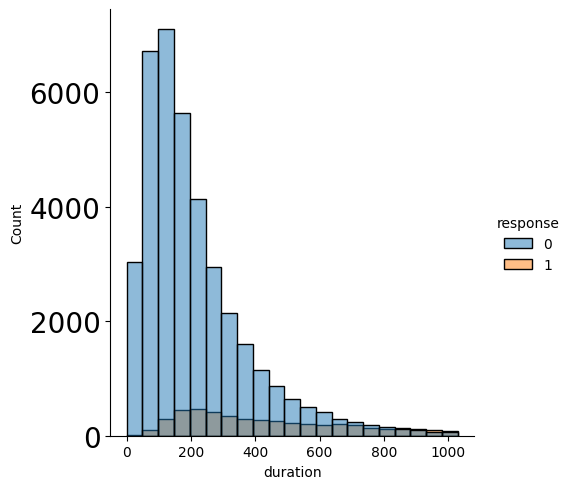

In [554]:
# duration: number of days

plt.figure(figsize=(10,15))
sns.displot(x='duration', hue='response', data=df_new, binwidth= 50)

In [555]:
# duration is a strong predictor of response.

# Longer calls are correlated with successful response, while shorter calls are correlated with rejection.
# duration (x-axis): This represents the length of each customer call in seconds. 
# For example, 100 on the x-axis means the call lasted 100 seconds.
# Count (y-axis): This is the number of calls that fall into each duration “bin.” 
# For example, a bar reaching 1500 means that around 1500 calls had durations within that range.

<Axes: xlabel='poutcome', ylabel='duration'>

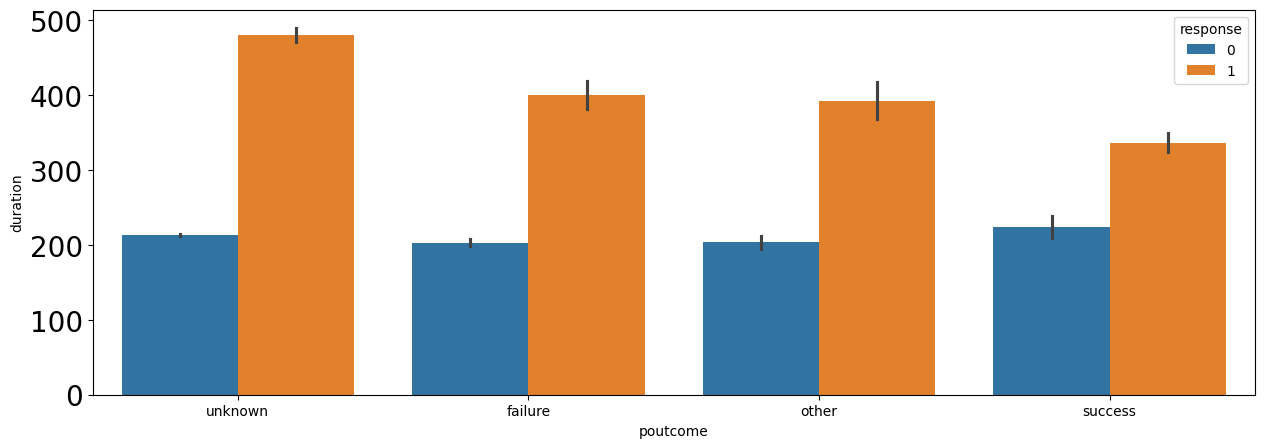

In [556]:
plt.figure(figsize=(15,5))
sns.barplot(x='poutcome', y = 'duration', hue='response', data=df)


In [557]:
# We get to know that if the longer duration to call customer then the chances 
# that customer take our product is also increasing
# and we also know that the minimum duration for making calls is 200s or 3 minutes

<Axes: xlabel='housing', ylabel='response'>

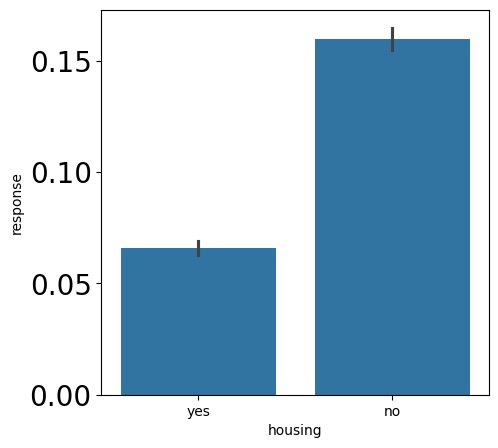

In [558]:
plt.figure(figsize=(5,5))
sns.barplot(x='housing',y='response',data=df)

In [559]:
# we get insight customer that dont have house are have higher probability to buy our product(loan).
# no means not having house so they have higher response.

----------------- Modelling ---------------------

In [ ]:
# Label Encoding
# All categorical features are converted to numeric, which is necessary for most machine learning algorithms.


# Dates might not be useful directly for modeling without extracting features (like month, day, weekday). but in our data its already seperated.
if 'contacted_date' in df.columns.to_list():
    df.drop(['contacted_date'], axis=1, inplace=True)
if 'pcontacted_date' in df.columns.to_list():
    df.drop(['pcontacted_date'], axis=1, inplace=True)

for x in df.select_dtypes(include='object').columns.to_list():
    df[x] = df[x].astype('category').cat.codes

df.head()


,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,5,1,4,100000,1,2,6,1,0,...,0,2,5,8,261,1,0,0,3,0
1,44,4,1,9,60000,2,1,9,1,0,...,0,2,5,8,151,1,0,0,3,0
2,33,3,1,2,120000,1,1,5,1,0,...,1,2,5,8,76,1,0,0,3,0
3,47,4,1,1,20000,1,3,7,0,0,...,0,2,5,8,92,1,0,0,3,0
4,33,3,1,11,0,2,3,11,0,0,...,0,2,5,8,198,1,0,0,3,0


response
0    38125
1     4582
Name: count, dtype: int64


<Axes: xlabel='response', ylabel='count'>

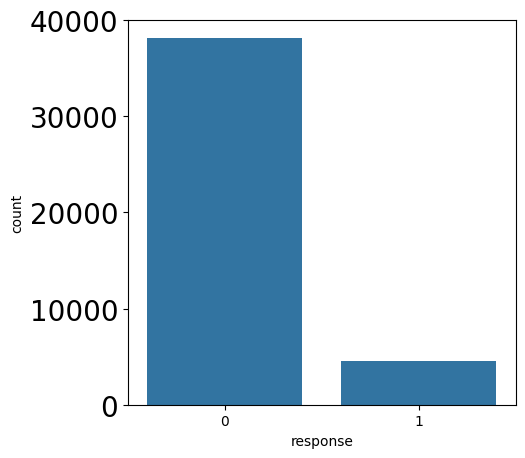

In [ ]:
# check imbalance

response = df['response'].value_counts()
print(response)
plt.figure(figsize=(5,5))
sns.countplot(x = 'response', data=df)

In [562]:
# If one class (e.g., 0) is much larger than the other (e.g., 1), 
# that means have an imbalanced target, which can affect model performance.

In [563]:
non_target = df.drop(['response'], axis=1)
target = df[['response']]

In [564]:
# Do 'smote' to balancing our target column

# SMOTE = Synthetic Minority Over-sampling Technique
# Instead of just duplicating minority samples, it creates new, synthetic samples between existing minority points 
# and their nearest neighbors.

# This increases the size of the minority class and makes the dataset more balanced.

from imblearn import under_sampling, over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(non_target,target)
print('SMOTE : ')
print((y_over).value_counts())

SMOTE : 
response
0           38125
1           19062
Name: count, dtype: int64


<Axes: xlabel='response', ylabel='count'>

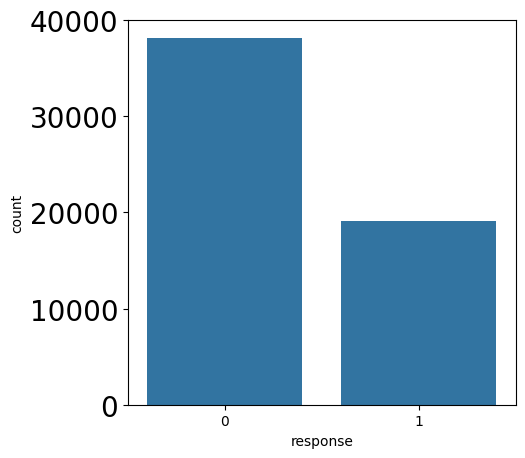

In [565]:
#plotting target column after do smote

plt.figure(figsize=(5, 5))
sns.countplot(x ='response', data = y_over)

In [566]:
# --------------------- Testing and Training -----------------------------

In [567]:
# Spliting the dataset

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.3, random_state = 42)

In [568]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

def eval_classification(pred , ytest):
    print("\nAccuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    print("Mean squared error (Test set) : %.2f" % mean_squared_error(ytest,pred))

In [569]:
# LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = model.score(X_test,y_test)
print(f"Mean Squared Error: {mse:.2f}")
print(f"final score: {score:.2f}")

# print("Training Data:\n", X_train)
# print("\nTesting Data:\n", X_test)
# print("\nPredictions:", y_pred)
# print("Actual:", np.array(y_test))


Mean Squared Error: 0.10
final score: 0.53


In [570]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_classification(y_pred , y_test)

score = model.score(X_test,y_test)
print(f"final score: {score:.2f}")



C:\Users\Vansh.Chaurasia\AppData\Roaming\Python\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Accuracy (Test Set): 0.84
Precision (Test Set): 0.72
Recall (Test Set): 0.82
F1-Score (Test Set): 0.77
Mean squared error (Test set) : 0.16
final score: 0.84


In [571]:
# Xgboost

from xgboost import XGBClassifier

model =  XGBClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

eval_classification(y_pred , y_test)

score = model.score(X_test,y_test)
print(f"final score: {score:.2f}")



Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.88
F1-Score (Test Set): 0.89
Mean squared error (Test set) : 0.07
final score: 0.93



Accuracy (Test Set): 0.88
Precision (Test Set): 0.81
Recall (Test Set): 0.82
F1-Score (Test Set): 0.82
Mean squared error (Test set) : 0.12
final score: 0.88


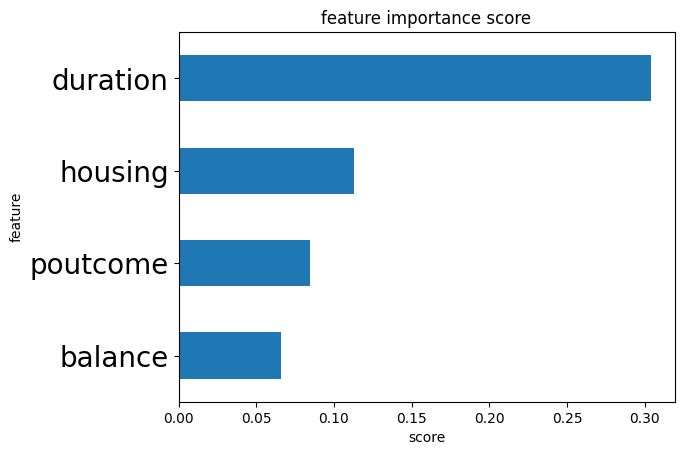

In [572]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

eval_classification(y_pred , y_test)

score = model.score(X_test,y_test)
print(f"final score: {score:.2f}")

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
ax = feat_importances.nlargest(4).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')


plt.show()

C:\Users\Vansh.Chaurasia\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Accuracy (Test Set): 0.92
Precision (Test Set): 0.90
Recall (Test Set): 0.87
F1-Score (Test Set): 0.88
Mean squared error (Test set) : 0.08
final score: 0.92


Text(0.5, 1.0, 'feature importance score')

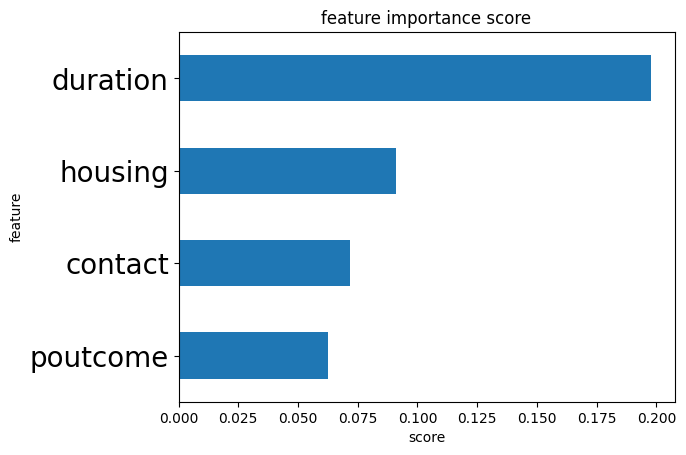

In [575]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

model =  ExtraTreesClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

eval_classification(y_pred , y_test)

score = model.score(X_test,y_test)
print(f"final score: {score:.2f}")

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
ax = feat_importances.nlargest(4).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')


Conclusion :

After testing multiple models, we selected ExtraTreesClassifier for prediction.

The model also provided feature importance scores.

These important features will help us identify and prioritize the target customers more effectively.